# Visualisation of UP waveforms

## Import

In [1]:
import os 
os.chdir('/CSNG/studekat/ripple_band_project/code')

In [29]:
from functions_analysis import *
import pandas as pd
import numpy as np
import yaml
import pickle
import neo
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## Parameters

In [3]:
with open("/CSNG/studekat/ripple_band_project/code/params_analysis.yml") as f:
    params = yaml.safe_load(f)
### AUX = params['aux']

DATA_FOLDER = params['data_folder'] ### folder with all the preprocessed data
DATES = params['dates']

DF_FOLDER = '/CSNG/studekat/ripple_band_project/dataframes' ### here the resulting dataframes will be saved
MONKEY_LIST = ['L','N','F','A']

## Data loading

In [4]:
df_list = []
for monkey in MONKEY_LIST:
    print(monkey)
    all_RS_dates = params['dates'][monkey]['RS']
    for date in all_RS_dates:
        print(date)
        with open(f'{DF_FOLDER}/sua_prop_all/monkey{monkey}_all_arrays_date_{date}.pkl', "rb") as file:
             df_sua = pickle.load(file)
        df_list.append(df_sua)

df_merged = pd.concat(df_list,ignore_index=True)

L
20170725
20170809
20170810
N
20240719_B1
20240719_B2
F
20240122_B1
20241216_B1
A
20190815
20190816


## Functions

In [23]:
def plot_UP_wfs(df_prop,num_cols=4,title=''):
    """
    Plots all UP wave forms the dataframe.
    """
    df_up = df_prop[df_prop['wf_direction']=='UP']
    num_rows = int(np.ceil(df_up.shape[0]/num_cols))
    
    fig, ax = plt.subplots(num_rows,num_cols,sharex=True,sharey=True)
    fig.set_figheight(2*num_rows)
    fig.set_figwidth(12)

    plt.suptitle(f'UP Waveforms {title}')

    for row in range(num_rows):
        for col in range(num_cols):
            try:
                df_row = int(row*num_cols + col)
                wf_zsc = df_up.iloc[df_row]['avg_wf_zscored']
                final_cl = df_up.iloc[df_row]['final_class']
                angle_lock = df_up.iloc[df_row]['pref_phase_all_spikes']
                r_lock = df_up.iloc[df_row]['norm_phase_sel_01_all_spikes']
                if num_rows>1:
                    axi = ax[row,col]
                else:
                    axi = ax[col]
                if final_cl=='UP_peak':
                    cl_color='green'
                elif final_cl=='UP_other':
                    cl_color='k'
                else:
                    print('Wrong UP class.')
                
                axi.plot(wf_zsc,color=cl_color,alpha=0.7,label=f'R: {np.round(r_lock,2)} \n PHI: {np.round(angle_lock,2)}')
                axi.spines['top'].set_visible(False)
                axi.spines['right'].set_visible(False)
                axi.set_xticks(np.arange(0,91,15))
                axi.set_xticklabels(np.linspace(0,3,7,endpoint=True))
                axi.set_xlabel('ms')
                axi.legend(loc='upper right',fontsize=9)
            except:
                pass

    plt.show()
    plt.close()
    return

## Plotting

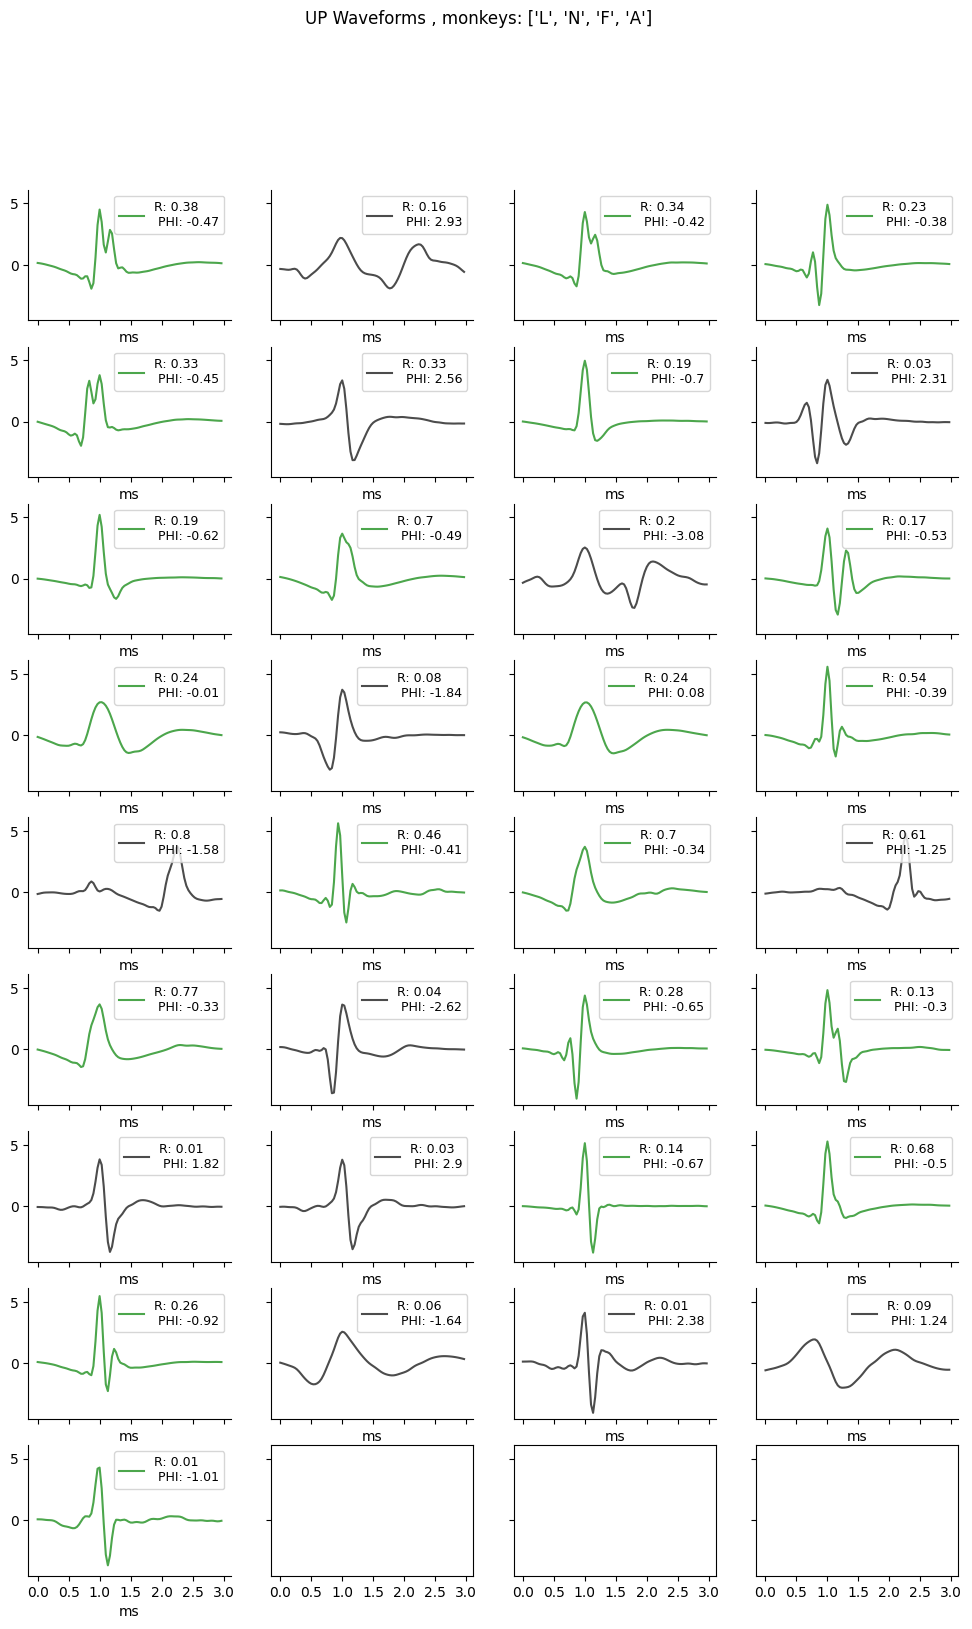

In [36]:
plot_UP_wfs(df_merged,num_cols=4,title=f', monkeys: {MONKEY_LIST}')

In [25]:
df_merged.keys()

Index(['FR', 'CV_ISI', 'ISI', 'env_th_median', 'list_phases', 'list_env',
       'list_env_phases', 'list_phases_high_env', 'list_env_phases_high_env',
       'list_phases_low_env', 'list_env_phases_low_env', 'FR_high_env_median',
       'FR_low_env_median', 'FR_high_env_low_env_median_ratio',
       'pref_phase_all_spikes', 'norm_phase_sel_01_all_spikes',
       'pref_env_phase_all_spikes', 'norm_env_phase_sel_01_all_spikes',
       'env_th_perc_10', 'env_th_perc_20', 'env_th_perc_30', 'env_th_perc_40',
       'env_th_perc_50', 'env_th_perc_60', 'env_th_perc_70', 'env_th_perc_80',
       'env_th_perc_90', 'env_th_perc_95', 'cell_name', 'pref_OP',
       'selectivity_OP_01', 'channel_order', 'array', 'area', 'train_order',
       'avg_wf', 'amp_wf', 'width_wf', 'avg_wf_zscored', 'amp_wf_zscored',
       'width_wf_class', 'wf_direction', 'final_class'],
      dtype='object')

## PCA UP waveforms

In [34]:
X = np.vstack(df_both_green['avg_wf_zscored'].values)[:,15:45]

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

labels = df_both_green['final_class']

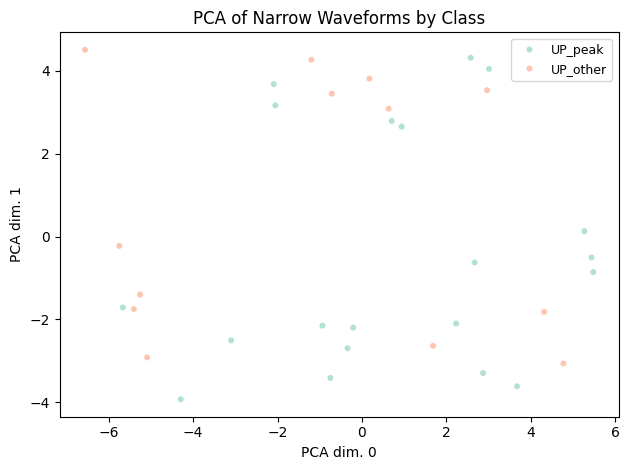

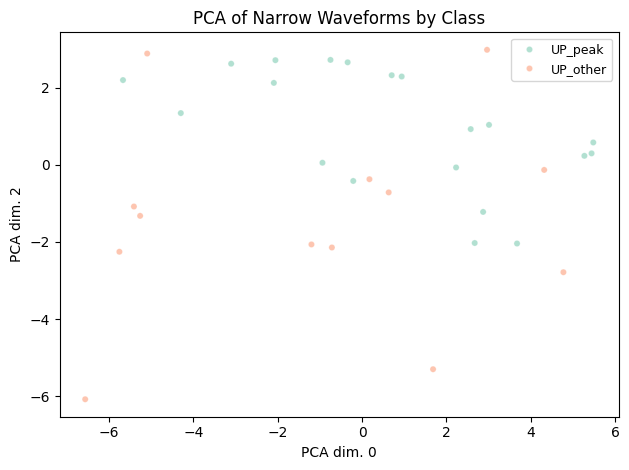

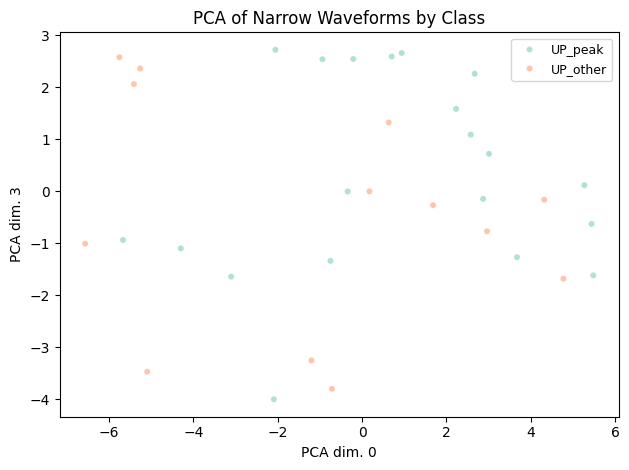

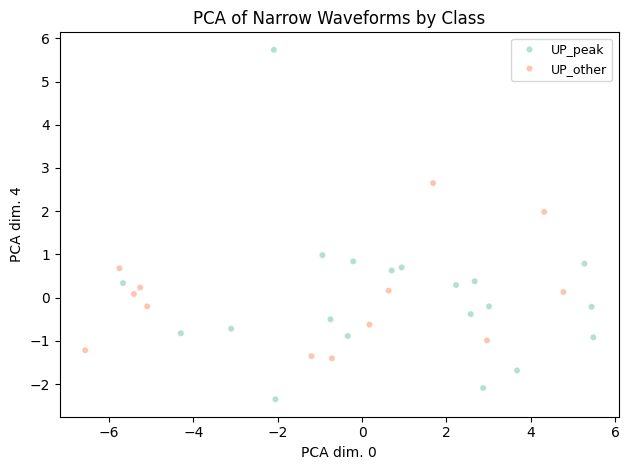

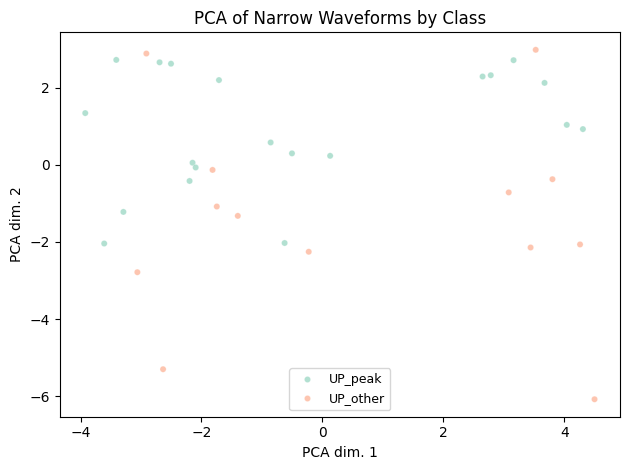

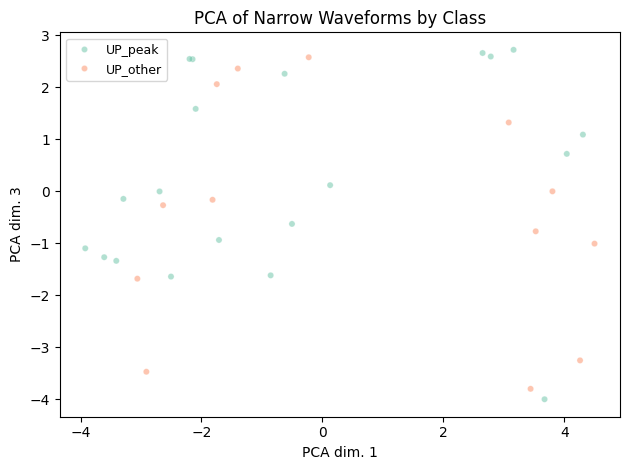

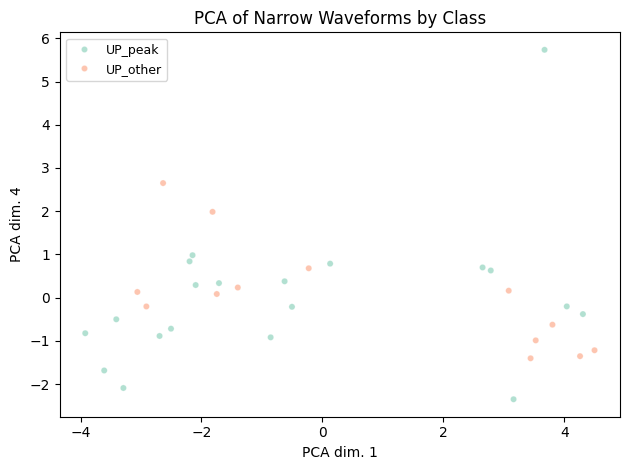

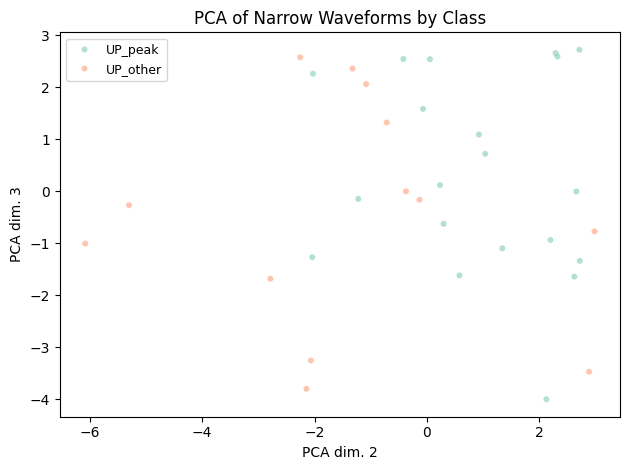

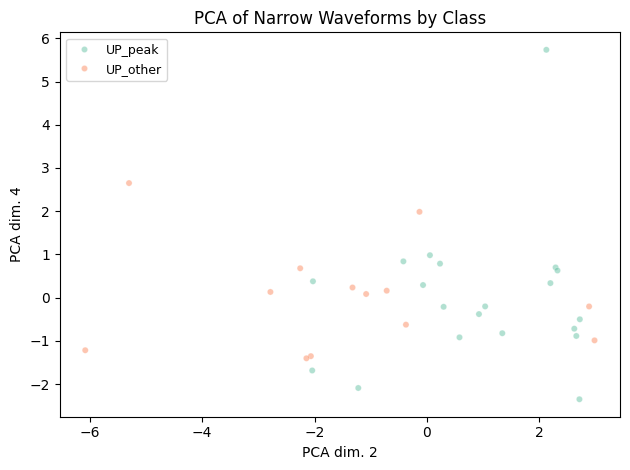

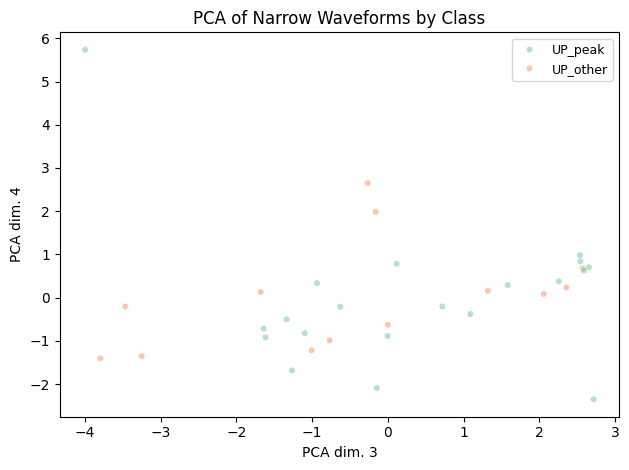

In [35]:
for comp1, comp2 in list(itertools.combinations(range(5), 2)):
    sns.scatterplot(x=X_pca[:, comp1], y=X_pca[:, comp2], hue=labels, palette='Set2', s=20, alpha=0.5)
    plt.xlabel(f'PCA dim. {comp1}')
    plt.ylabel(f'PCA dim. {comp2}')
    plt.title('PCA of Narrow Waveforms by Class')
    plt.legend(loc='best', fontsize=9)
    plt.tight_layout()
    plt.show()

## tSNE UP waveforms

In [30]:
df_both_green = df_merged[df_merged['wf_direction']=='UP']

df_light = df_both_green[df_both_green['final_class']=='UP_peak']

df_dark = df_both_green[df_both_green['final_class']=='UP_other']

In [31]:
X = np.vstack(df_both_green['avg_wf_zscored'].values)[:,15:45]

tsne = TSNE(n_components=3)
X_tsne = tsne.fit_transform(X)

labels = df_both_green['final_class']

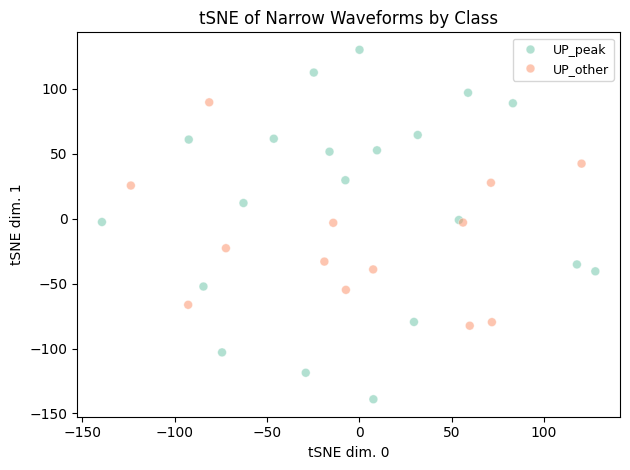

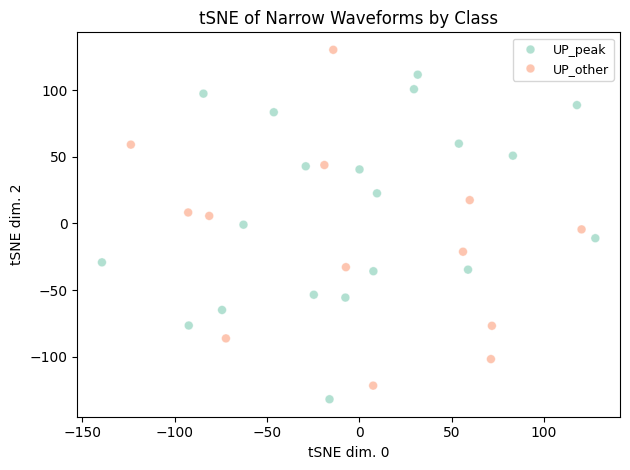

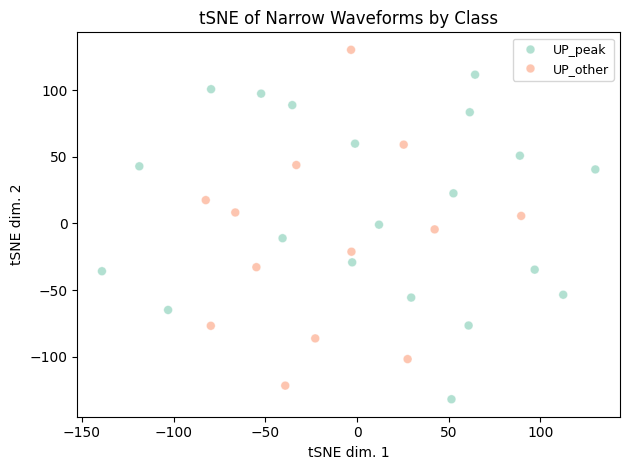

In [33]:
for comp1, comp2 in list(itertools.combinations(range(3), 2)):
    sns.scatterplot(x=X_tsne[:, comp1], y=X_tsne[:, comp2], hue=labels, palette='Set2', s=40, alpha=0.5)
    plt.xlabel(f'tSNE dim. {comp1}')
    plt.ylabel(f'tSNE dim. {comp2}')
    plt.title('tSNE of Narrow Waveforms by Class')
    plt.legend(loc='best', fontsize=9)
    plt.tight_layout()
    plt.show()

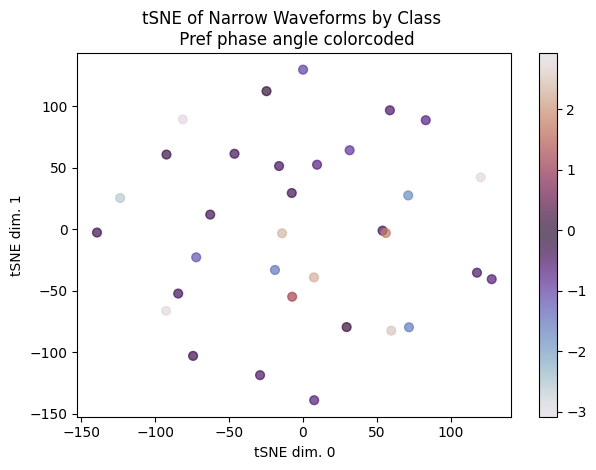

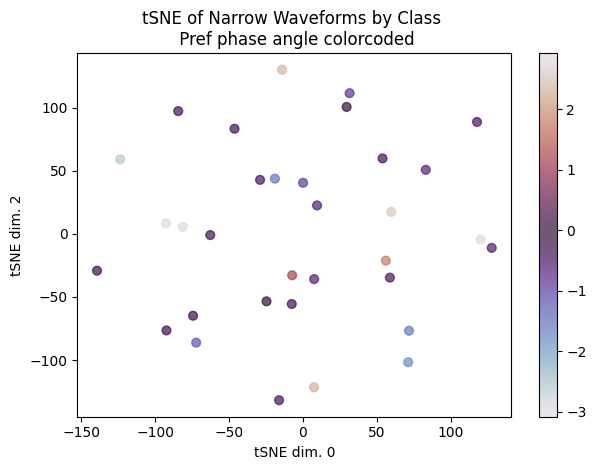

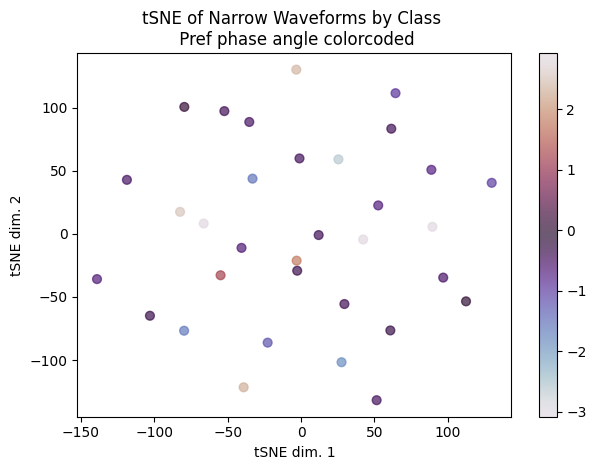

In [32]:
phase_pref = df_both_green['pref_phase_all_spikes']
for comp1, comp2 in list(itertools.combinations(range(3), 2)):
    sc=plt.scatter(x=X_tsne[:, comp1], y=X_tsne[:, comp2], 
                    c=phase_pref.values,s=40, alpha=0.7,cmap='twilight')
    plt.xlabel(f'tSNE dim. {comp1}')
    plt.ylabel(f'tSNE dim. {comp2}')
    plt.title('tSNE of Narrow Waveforms by Class \n Pref phase angle colorcoded')
    #plt.legend(loc='best', fontsize=9)
    plt.colorbar(sc)
    plt.tight_layout()
    plt.show()